In [1]:
# Importar librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# librerías de para evaluar el modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

#Librería para evitar la advertencia de que el modelo de KMeans tiene una pérdida de memoria en Windows 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Cargar el dataset
df = pd.read_csv('Mall_Customers.csv')

# Ver los primeros registros
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
# Ver la cantidad de registros y columnas
df.shape

(200, 5)

In [5]:
# Ver los tipos de datos
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
# Ver las estadisticas del dataset
df.describe().style.background_gradient(cmap='viridis')

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
# Ver las estadisticas de Annual Income (k$), Spending Score (1-100) con detalles
df[['Annual Income (k$)', 'Spending Score (1-100)']].describe().style.background_gradient(cmap='viridis')

,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000
mean,60.560000,50.200000
std,26.264721,25.823522
min,15.000000,1.000000
25%,41.500000,34.750000
50%,61.500000,50.000000
75%,78.000000,73.000000
max,137.000000,99.000000


In [8]:
# Ver los cuartiles de Annual Income (k$), Spending Score (1-100)
df[['Annual Income (k$)', 'Spending Score (1-100)']].quantile([0.25, 0.5, 0.75]). style.background_gradient(cmap='viridis')

,Annual Income (k$),Spending Score (1-100)
0.250000,41.500000,34.750000
0.500000,61.500000,50.000000
0.750000,78.000000,73.000000


In [9]:
# Ver cantidad de valores nulos
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
# Ver cantidad de valores duplicados
df.duplicated().sum()

np.int64(0)

In [11]:
# Ver cantidad de valores NaN
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [12]:
# Ver la cantidad de valores unicos
df.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [13]:
# Ver número de datos de Gender
df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [14]:
# Ver rangos de edad
df['Age'].value_counts(bins=5)

(28.4, 38.8]      63
(17.947, 28.4]    50
(38.8, 49.2]      42
(49.2, 59.6]      25
(59.6, 70.0]      20
Name: count, dtype: int64

In [15]:
# Ver minimo y maximo de edad
df['Age'].min(), df['Age'].max()

(np.int64(18), np.int64(70))

In [16]:
# Ver rango de Annual Income (k$)
df['Annual Income (k$)'].min(), df['Annual Income (k$)'].max()

(np.int64(15), np.int64(137))

In [17]:
# Ver rango de Spending Score (1-100)
df['Spending Score (1-100)'].min(), df['Spending Score (1-100)'].max()

(np.int64(1), np.int64(99))

In [3]:
# Importar la librería fm de matplotlib
from matplotlib import font_manager as fm

# Configurar el estilo de los gráficos ggplot
plt.style.use('classic')

# Ruta a la fuente personalizada
font_path = 'KellySlab-Regular.ttf'  # Rura a la fuente personalizada

# Registrar la fuente en matplotlib
font_prop = fm.FontProperties(fname=font_path)
fm.fontManager.addfont(font_path)  # Registrar la fuente en el gestor de fuentes

# Configurar como fuente predeterminada para todos los textos (títulos, etiquetas y números)
plt.rcParams['font.family'] = font_prop.get_name()

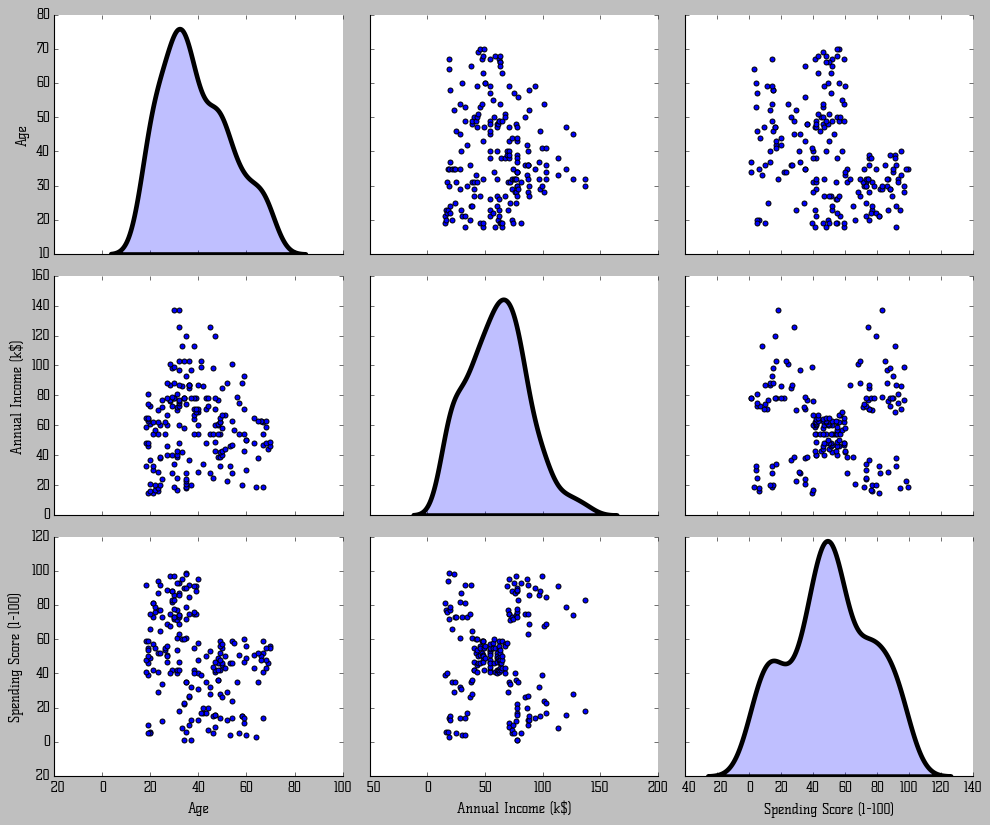

In [19]:
# Crear un pairplot de las variables numéricas
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], diag_kind='kde', markers={'s'}, height=3.5, aspect=1.2, diag_kws={'linewidth': 4.2, 'edgecolor': 'k'}, plot_kws={'linewidth': 0.9, 'edgecolor': 'k'})
plt.show()

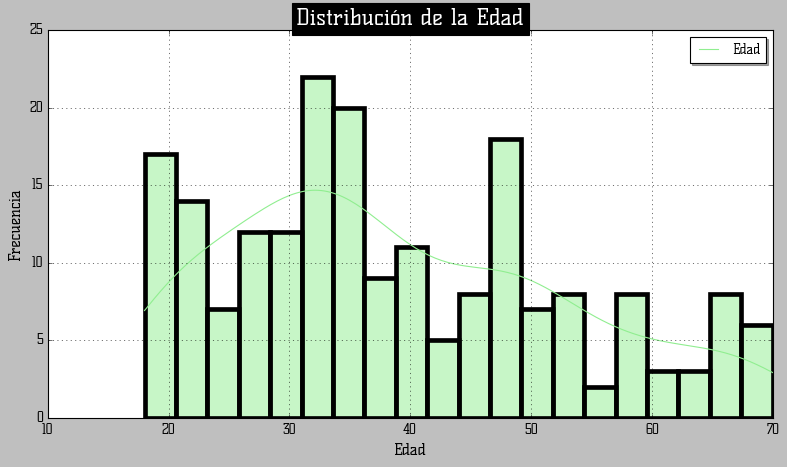

In [20]:
# Graficar la distribución de la edad
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='lightgreen', edgecolor='black', linewidth=4.2)
plt.title('Distribución de la Edad', fontsize=20, fontweight='bold', backgroundcolor='black', color='white')
plt.xlabel('Edad', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Frecuencia', fontsize=14, fontweight='bold', color='black')
plt.xticks(fontsize=12, fontweight='bold', color='black')
plt.yticks(fontsize=12, fontweight='bold', color='black')
plt.grid()
plt.tight_layout()
plt.legend(['Edad'], fontsize=12, loc='best', shadow=True, facecolor='white', edgecolor='black')
plt.show()

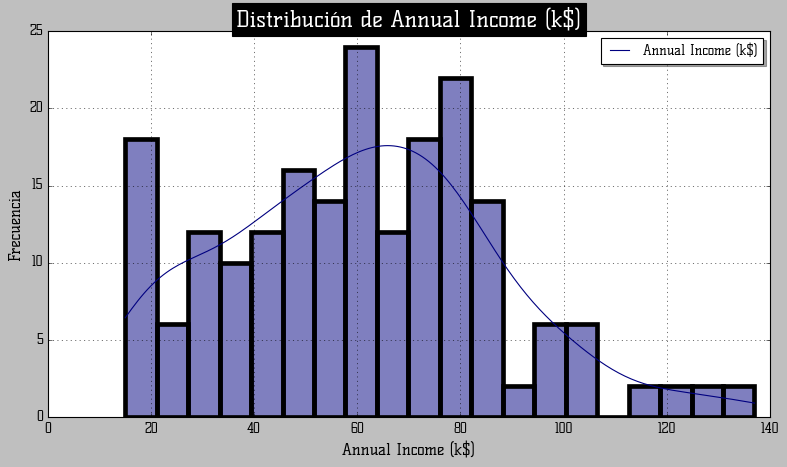

In [21]:
# Graficar la distribución de Annual Income (k$)
plt.figure(figsize=(10, 6))
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True, color='navy', edgecolor='black', linewidth=4.2)
plt.title('Distribución de Annual Income (k$)', fontsize=20, fontweight='bold', backgroundcolor='black', color='white')
plt.xlabel('Annual Income (k$)', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Frecuencia', fontsize=14, fontweight='bold', color='black')
plt.xticks(fontsize=12, fontweight='bold', color='black')
plt.yticks(fontsize=12, fontweight='bold', color='black')
plt.grid()
plt.tight_layout()
plt.legend(['Annual Income (k$)'], fontsize=12, loc='best', shadow=True, facecolor='white', edgecolor='black')
plt.show()

In [22]:
# Calcular las correlaciones excluyendo la columna 'Gender'
correlations = df.drop('Gender', axis=1).corr().unstack().sort_values(ascending=False)

# Filtrar las correlaciones duplicadas y la diagonal (correlación de una variable consigo misma)
correlations = correlations[correlations != 1].drop_duplicates()

# Imprimir las correlaciones de mayor a menor
print(correlations)

CustomerID              Annual Income (k$)        0.977548
Spending Score (1-100)  CustomerID                0.013835
                        Annual Income (k$)        0.009903
Annual Income (k$)      Age                      -0.012398
CustomerID              Age                      -0.026763
Age                     Spending Score (1-100)   -0.327227
dtype: float64


In [5]:
# Convertir la variable Gender a numérico 0 y 1
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

# Ver los primeros registros para confirmar la conversión
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
5,6,0,22,17,76
6,7,0,35,18,6
7,8,0,23,18,94
8,9,1,64,19,3
9,10,0,30,19,72


In [24]:
# Verificar nulos
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

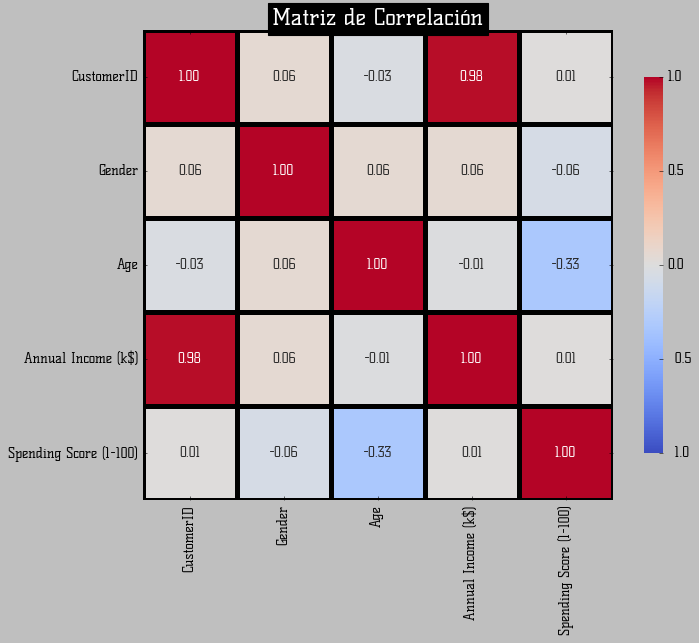

In [25]:
# Calcular la matriz de correlación
corr = df.corr()

# Graficar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', square=True, vmin=-1, vmax=1, linewidths=4.2, linecolor='black', cbar_kws={'shrink': 0.8})
plt.title('Matriz de Correlación', fontsize=20, fontweight='bold', backgroundcolor='black', color='white')
plt.xticks(fontsize=12, fontweight='bold', color='black')
plt.yticks(fontsize=12, fontweight='bold', color='black')
plt.tight_layout()
plt.show()

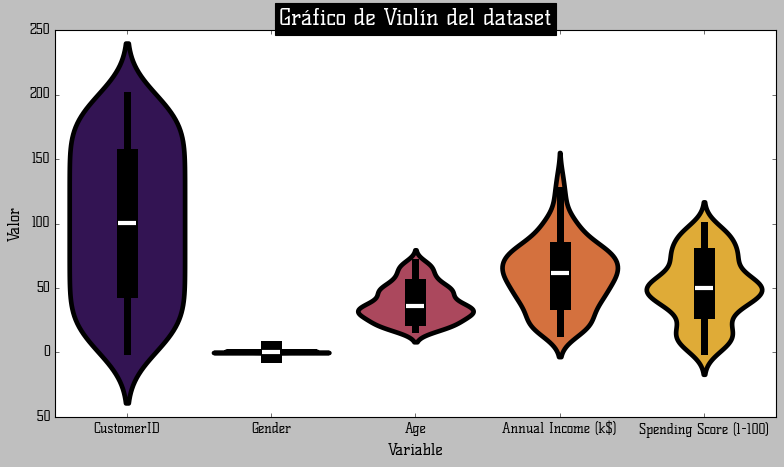

In [26]:
# Grafico de violín de las dos variables importantes
plt.figure(figsize=(10, 6))
sns.violinplot(df, palette='inferno', linewidth=4.2, edgecolor='black')
plt.title('Gráfico de Violín del dataset', fontsize=20, fontweight='bold', backgroundcolor='black', color='white')
plt.xlabel('Variable', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Valor', fontsize=14, fontweight='bold', color='black')
plt.xticks(fontsize=12, fontweight='bold', color='black')
plt.yticks(fontsize=12, fontweight='bold', color='black')
plt.tight_layout()
plt.show()

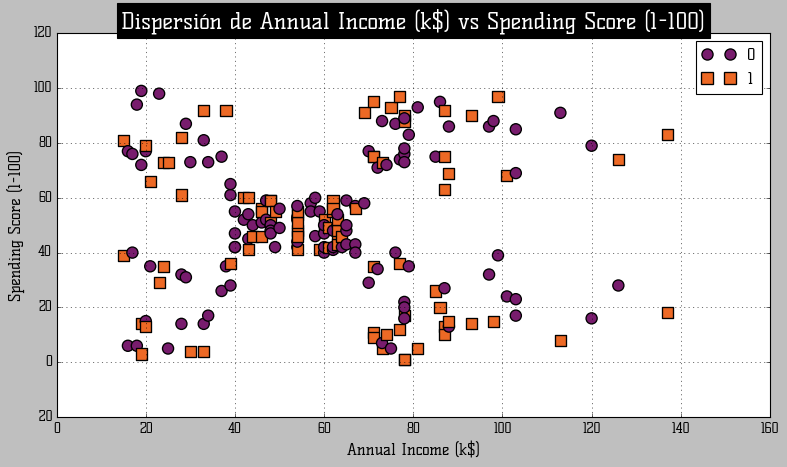

In [27]:
# Gráfico de dispersión de Annual Income (K$) y Spending Score (1-100)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue='Gender', style='Gender', markers=['o', 's'], palette='inferno', edgecolor='black', linewidth=1.2, s=100)
plt.title('Dispersión de Annual Income (k$) vs Spending Score (1-100)', fontsize=20, fontweight='bold', backgroundcolor='black', color='white')
plt.xlabel('Annual Income (k$)', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Spending Score (1-100)', fontsize=14, fontweight='bold', color='black')
plt.xticks(fontsize=12, fontweight='bold', color='black')
plt.yticks(fontsize=12, fontweight='bold', color='black')
plt.grid()
plt.tight_layout()
plt.legend()
plt.show()

# **Modelado** 

### **Algoritmo de K-Means** 

In [6]:
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

# Escalar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop('CustomerID', axis=1))

# Seleccionar las características más relevantes
selector = SelectKBest(score_func=f_classif, k=3)
selector.fit(df_scaled, df['Spending Score (1-100)'])
selected_features = selector.get_support(indices=True)

# Crear un nuevo DataFrame con las características seleccionadas
df_selected = df.iloc[:, selected_features]

# Aplicar K-means con las características seleccionadas
kmeans = KMeans(n_clusters=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_selected)

# Ver los primeros registros con los clusters asignados
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,2
1,2,1,21,15,81,2
2,3,0,20,16,6,2
3,4,0,23,16,77,2
4,5,0,31,17,40,2
5,6,0,22,17,76,2
6,7,0,35,18,6,2
7,8,0,23,18,94,2
8,9,1,64,19,3,2
9,10,0,30,19,72,2


In [7]:
# Ver todos los clusters asignados
df['Cluster'].value_counts()

Cluster
4    27
2    24
9    24
0    23
3    23
1    23
5    18
8    13
7    13
6    12
Name: count, dtype: int64

In [30]:
df_selected.head(10)

,CustomerID,Age,Annual Income (k$)
0,1,19,15
1,2,21,15
2,3,20,16
3,4,23,16
4,5,31,17
5,6,22,17
6,7,35,18
7,8,23,18
8,9,64,19
9,10,30,19


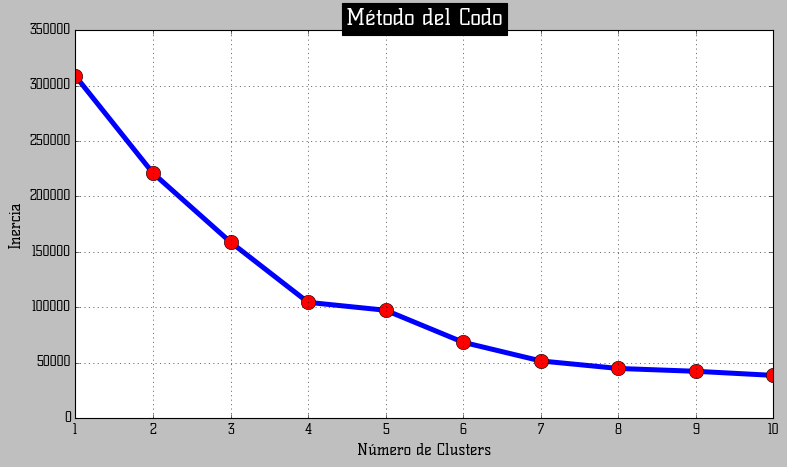

In [13]:
# Gráfica de Codo para identificar valores de K
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_selected)
    inertia.append(kmeans.inertia_)

# Graficar la inercia
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', color='blue', markersize=13, linewidth=4.5, markerfacecolor='red')
plt.title('Método del Codo', fontsize=20, fontweight='bold', backgroundcolor='black', color='white')
plt.xlabel('Número de Clusters', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Inercia', fontsize=14, fontweight='bold', color='black')
plt.xticks(range(1, 11), fontsize=12, fontweight='bold', color='black')
plt.yticks(fontsize=12, fontweight='bold', color='black')
plt.grid()
plt.tight_layout()
plt.show()

### **Evaluación**

In [17]:
# Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Calcular el Coeficiente de Silhouette
silhouette = silhouette_score(df_selected, df['Cluster'])
# Calcular el ��ndice de Calinski-Harabasz
calinski_harabasz = calinski_harabasz_score(df_selected, df['Cluster'])
# Calcular el ��ndice de Davies-Bouldin
davies_bouldin = davies_bouldin_score(df_selected, df['Cluster'])
# Calcular el número de observaciones
n_samples = len(df_selected)
X = df.drop('Cluster', axis=1)
clusters = df['Cluster']

# Crear una tabla
results = pd.DataFrame({
    'Métrica': ['Silhouette Coefficient', 'Calinski-Harabasz Score', 'Davies-Bouldin Score', 'Número de Observaciones'],
    'Ponderación': [silhouette, calinski_harabasz, davies_bouldin, n_samples]
})

# Imprime la tabla
from tabulate import tabulate

print(tabulate(results, headers='keys', tablefmt='fancy_grid'))

╒════╤═════════════════════════╤═══════════════╕
│    │ Métrica                 │   Ponderación │
╞════╪═════════════════════════╪═══════════════╡
│  0 │ Silhouette Coefficient  │      0.35182  │
├────┼─────────────────────────┼───────────────┤
│  1 │ Calinski-Harabasz Score │    141.726    │
├────┼─────────────────────────┼───────────────┤
│  2 │ Davies-Bouldin Score    │      0.924595 │
├────┼─────────────────────────┼───────────────┤
│  3 │ Número de Observaciones │    200        │
╘════╧═════════════════════════╧═══════════════╛


In [15]:
# Imprimir métricas con print
print(f'Coeficiente de Silhouette: {silhouette}')
print(f'Índice de Calinski-Harabasz: {calinski_harabasz}')
print(f'Índice de Davies-Bouldin: {davies_bouldin}')
print(f'Número de Observaciones: {n_samples}')

Coeficiente de Silhouette: 0.39682188832916687
Índice de Calinski-Harabasz: 148.7584858746224
Índice de Davies-Bouldin: 0.8841022295032076
Número de Observaciones: 200


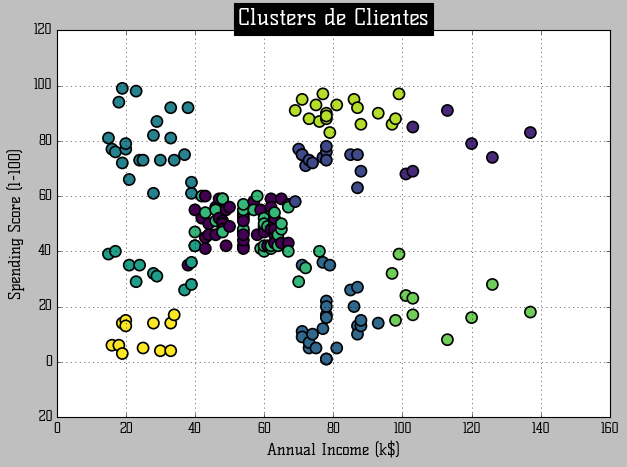

In [14]:
# Gráfica de los diferentes clusters
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis', s=100, edgecolor='black', linewidth=1.5)
plt.title('Clusters de Clientes', fontsize=20, fontweight='bold', backgroundcolor='black', color='white')
plt.xlabel('Annual Income (k$)', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Spending Score (1-100)', fontsize=14, fontweight='bold', color='black')
plt.xticks(fontsize=12, fontweight='bold', color='black')
plt.yticks(fontsize=12, fontweight='bold', color='black')
plt.grid()
plt.tight_layout()
plt.show()


---

# **Análisis de los resultados**

### **Coeficiente de Silhouette (Silhouette Score):** `0.3968`
   
   - **Interpretación**: Un valor de `0.3968` indica que los clusters tienen una separación baja, y no están bien definidos. Aunque no es ideal, indica una cierta estructura de agrupación que podría ser aceptable dependiendo del contexto y los datos.

---

### **Índice de Calinski-Harabasz (Calinski-Harabasz Index):** `148.7584`

   - **Interpretación**: Un valor de `148.7584` es considerablemente alto, lo cual sugiere que, desde la perspectiva de este índice, los clusters son relativamente compactos y bien diferenciados. Esto refuerza la idea de que, aunque los clusters no son perfectos (según el coeficiente de Silhouette), sí existe una estructura de agrupación bastante consistente en los datos.

---

### **Índice de Davies-Bouldin (Davies-Bouldin Index):** `0.8841`
   
   - **Interpretación**: Con un valor de `0.8841`, este índice sugiere una calidad de clustering aceptable, donde los clusters están razonablemente separados entre sí, aunque no de forma óptima.

---

In [12]:
# Ajustar hiperparametros
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

# Escalar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop('CustomerID', axis=1))

# Seleccionar las características más relevantes
selector = SelectKBest(score_func=f_classif, k=3)
selector.fit(df_scaled, df['Spending Score (1-100)'])
selected_features = selector.get_support(indices=True)

# Crear un nuevo DataFrame con las características seleccionadas
df_selected = df.iloc[:, selected_features]

# Aplicar K-means con diferentes valores de K
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df['Cluster'] = kmeans.fit_predict(df_selected)

    # Calcular el Coeficiente de Silhouette, el indice de Kalinski-Harabasz, Davies Bouldin y numero de observaciones
    silhouette = silhouette_score(df_selected, df['Cluster'])
    calinski_harabasz = calinski_harabasz_score(df_selected, df['Cluster'])
    davies_bouldin = davies_bouldin_score(df_selected, df['Cluster'])
    n_samples = len(df_selected)

    # Crear una tabla
    results = pd.DataFrame({
        'Métrica': ['Silhouette Coefficient', 'Calinski-Harabasz Score', 'Davies-Bouldin Score', 'Número de Observaciones'],
        'Ponderación': [silhouette, calinski_harabasz, davies_bouldin, n_samples]
    })

    # Imprimir la tabla
    print(f'Número de Clusters: {n_clusters}')
    print(tabulate(results, headers='keys', tablefmt='fancy_grid'))
    print()
    

Número de Clusters: 2
╒════╤═════════════════════════╤═══════════════╕
│    │ Métrica                 │   Ponderación │
╞════╪═════════════════════════╪═══════════════╡
│  0 │ Silhouette Coefficient  │      0.331971 │
├────┼─────────────────────────┼───────────────┤
│  1 │ Calinski-Harabasz Score │     78.5648   │
├────┼─────────────────────────┼───────────────┤
│  2 │ Davies-Bouldin Score    │      1.17985  │
├────┼─────────────────────────┼───────────────┤
│  3 │ Número de Observaciones │    200        │
╘════╧═════════════════════════╧═══════════════╛

Número de Clusters: 3
╒════╤═════════════════════════╤═══════════════╕
│    │ Métrica                 │   Ponderación │
╞════╪═════════════════════════╪═══════════════╡
│  0 │ Silhouette Coefficient  │      0.33558  │
├────┼─────────────────────────┼───────────────┤
│  1 │ Calinski-Harabasz Score │     93.1159   │
├────┼─────────────────────────┼───────────────┤
│  2 │ Davies-Bouldin Score    │      0.967751 │
├────┼──────────────────

# **Algoritmo Hierarchical Clustering**

In [ ]:
# Probar con el algoritmo hierarchical clustering con k 10
from sklearn.cluster import AgglomerativeClustering
# Aplicar Agglomerative Clustering
agglomerative_clustering = AgglomerativeClustering(n_clusters=10, linkage='ward')
df['Cluster'] = agglomerative_clustering.fit_predict(df_selected)

# Calcular el Coeficiente de Silhouette, el indice de Kalinski-Harabasz, Davies Bouldin y numero de observaciones
silhouette = silhouette_score(df_selected, df['Cluster'])
calinski_harabasz = calinski_harabasz_score(df_selected, df['Cluster'])
davies_bouldin = davies_bouldin_score(df_selected, df['Cluster'])
n_samples = len(df_selected)

# Crear una tabla
results = pd.DataFrame({
    'Métrica': ['Silhouette Coefficient', 'Calinski-Harabasz Score', 'Davies-Bouldin Score', 'Número de Observaciones'],
    'Ponderación': [silhouette, calinski_harabasz, davies_bouldin, n_samples]
})

# Imprimir la tabla
print(f'Número de Clusters: 10')
print(tabulate(results, headers='keys', tablefmt='fancy_grid'))

Número de Clusters: 10
╒════╤═════════════════════════╤═══════════════╕
│    │ Métrica                 │   Ponderación │
╞════╪═════════════════════════╪═══════════════╡
│  0 │ Silhouette Coefficient  │      0.35182  │
├────┼─────────────────────────┼───────────────┤
│  1 │ Calinski-Harabasz Score │    141.726    │
├────┼─────────────────────────┼───────────────┤
│  2 │ Davies-Bouldin Score    │      0.924595 │
├────┼─────────────────────────┼───────────────┤
│  3 │ Número de Observaciones │    200        │
╘════╧═════════════════════════╧═══════════════╛

